### Image Convert Cut Process

In [44]:
#!pip install pillow --upgrade

In [26]:
import PIL
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import shutil

In [54]:
print(PIL.__version__)

9.2.0


#### Sample

##### Image Convert To JPG

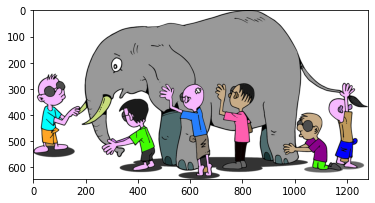

In [10]:
img = Image.open('ne.png')
plt.imshow(img)

In [11]:
img2 = img.convert("RGB")

In [12]:
img2.save("ne.jpg")

##### Cut Image With Aspect Ratio 

In [109]:
aspect_ratio_width = 3
aspect_ratio_height = 2
basewidth = 1200
size_width = int(basewidth)
size_heigth = int((basewidth/aspect_ratio_width)*aspect_ratio_height)
size = (size_width,size_heigth) 
print(size)

(1200, 800)


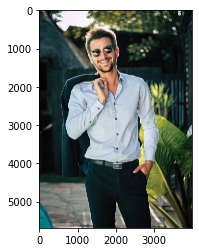

In [110]:
img = Image.open('adam.jpg')
plt.imshow(img)

In [118]:
width, height = img.size
height_var = int(height/aspect_ratio_height)
width_var = int(width/aspect_ratio_width)

if height_var == width_var:
    img_var = img.resize(size, Image.LANCZOS)
elif width_var > height_var:
    crop_width = int(abs((width-(height_var*aspect_ratio_width))/2))
    box = (crop_width,0,width-crop_width,height)  # left, top, right, bottom
    img_crop = img.crop(box)  
    img_var = img_crop.resize(size, Image.LANCZOS)
elif width_var < height_var:
    crop_height = int(abs((height-(width_var*aspect_ratio_height))/2))
    box = (0,crop_height,width,height-crop_height)  # left, top, right, bottom
    img_crop = img.crop(box)  # left, top, right, bottom
    img_var = img_crop.resize(size, Image.LANCZOS)
else:
    img_var = img

img_var.save("adam_crop2.jpg")

<ipython-input-118-49040c85354f>:15: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_var = img_crop.resize(size, Image.LANCZOS)


#### Multi Image Convert JPG And Crop

In [1]:
import PIL
from PIL import Image
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import shutil
import os 
from os.path import isfile, join
import glob

In [2]:
# language pair
lang_folder = "Turkish"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> target language for learner

# word start and end
word_start = 0  # 0  # native word start index
word_end = 200  # 200  # native word end index

##### Convert JPG

In [3]:
path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Image Audio Video/Data/200 Words"

#Path(path).mkdir(parents=True, exist_ok=True)

In [4]:
image_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Image Audio Video/Data/200 Words"

In [5]:
def convert_image_to_jpg(data_folder_name, data_path, out_folder_name, out_path):
    '''
    convert_image_to_jpg(data_folder_name, data_path, out_folder_name, out_path)\n
    data_folder_name, data_path, out_folder_name and out_path are path and folder in string.\n
    ex.\n
    path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"\n
    image_path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"\n
    convert_image_to_jpg("Images", image_path, "Images_JPG", path)
    '''
    result_path = f"{out_path}/{out_folder_name}"
    data_folder_path = f"{data_path}/{data_folder_name}"
    Path(result_path).mkdir(parents=True, exist_ok=True)
    files=[f for f in os.listdir(data_folder_path) if isfile(join(data_folder_path,f))]    
    for i in range(len(files)):
        #text = f"{text}"
        pathfilename=data_folder_path+'/'+files[i]
        filename_without_ext = os.path.splitext(files[i])[0]
        try:
            img = Image.open(pathfilename)
            img2 = img.convert("RGB")
            img2.save(f"{result_path}/{filename_without_ext}.jpg")
        except:
            print("Oops!", sys.exc_info()[0], "occurred.")

In [6]:
convert_image_to_jpg("Images", image_path, "Images_JPG", path)

Oops! <class 'PIL.UnidentifiedImageError'> occurred.


##### Crop And Size Images

In [8]:
path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Image Audio Video/Data/200 Words"

#Path(path).mkdir(parents=True, exist_ok=True)

In [9]:
image_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Image Audio Video/Data/200 Words"

In [10]:
aspect_ratio_width = 16
aspect_ratio_height = 9
basewidth = 1600
size_width = int(basewidth)
size_heigth = int((basewidth/aspect_ratio_width)*aspect_ratio_height)
size = (size_width,size_heigth) 
print(size)

(1600, 900)


In [11]:
def crop_and_size_image(text_list, data_folder_name, data_path, out_folder_name, out_path):
    '''
    crop_and_size_image(text_list, data_folder_name, data_path, out_folder_name, out_path)\n
    text_list is list values. data_folder_name, data_path, out_folder_name and out_path are path\n
    and folder in string(str)\n
    ex.\n
    path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"\n
    image_path = f"/media/kurubal/SSD/Data Scientist/Data Science/Data-Scientist/Work/Modern Ways/Image Audio/Product"\n
    crop_and_size_image(word_select_list, "Images_JPG", image_path, "Images_Crop_Size", path)
    '''
    result_path = f"{out_path}/{out_folder_name}"
    Path(result_path).mkdir(parents=True, exist_ok=True)
    no_image_file_list = []
    for text in text_list:
        try:
            img = Image.open(f"{data_path}/{data_folder_name}/{text}.jpg")
            width, height = img.size
            height_var = int(height/aspect_ratio_height)
            width_var = int(width/aspect_ratio_width)

            if height_var == width_var:
                img_var = img.resize(size, Image.LANCZOS)
            elif width_var > height_var:
                crop_width = int(abs((width-(height_var*aspect_ratio_width))/2))
                box = (crop_width,0,width-crop_width,height)  # left, top, right, bottom
                img_crop = img.crop(box)  
                img_var = img_crop.resize(size, Image.LANCZOS)
            elif width_var < height_var:
                crop_height = int(abs((height-(width_var*aspect_ratio_height))/2))
                box = (0,crop_height,width,height-crop_height)  # left, top, right, bottom
                img_crop = img.crop(box)  # left, top, right, bottom
                img_var = img_crop.resize(size, Image.LANCZOS)
            else:
                img_var = img

            img_var.save(f"{result_path}/{text}.jpg")            
        except:
            no_image_file_list.append(text)
            print("Oops!", sys.exc_info()[0], "occurred.")
            
    return no_image_file_list

In [13]:
df_word_all = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.lower().capitalize()}/Deployment/Data/Word/Word_Merge_Preprocess.xlsx")
#df_word_all = pd.read_excel("test.xlsx")
df_word_all

,word,frequency
0,bir,18835735
1,bu,11062659
2,ne,8025880
3,ve,7766036
4,için,5484109
...,...,...
987922,karneleme,5
987923,karnaya,5
987924,dörtlümüzün,5
987925,karnavalınız,5


In [14]:
df_word_select = df_word_all.iloc[word_start:word_end,]
df_word_select

,word,frequency
0,bir,18835735
1,bu,11062659
2,ne,8025880
3,ve,7766036
4,için,5484109
...,...,...
195,saat,399989
196,onunla,399330
197,yapıyorsun,398274
198,neler,397377


In [15]:
word_select_list = df_word_select["word"].values.tolist()

In [16]:
crop_and_size_image(word_select_list, "Images_JPG", image_path, "Images_Crop_Size", path)

<ipython-input-11-4568a6e24a71>:32: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_var = img_crop.resize(size, Image.LANCZOS)
<ipython-input-11-4568a6e24a71>:27: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_var = img_crop.resize(size, Image.LANCZOS)


Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.


<ipython-input-11-4568a6e24a71>:22: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_var = img.resize(size, Image.LANCZOS)


Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'> occurred.
Oops! <class 'FileNotFoundError'

['ve',
 'de',
 'var',
 'hayır',
 'kadar',
 'bana',
 'tamam',
 'ki',
 'ya',
 'hadi',
 'lütfen',
 'bile',
 'yani',
 'peki',
 'çünkü',
 'biri',
 'hey',
 'efendim',
 'demek',
 'teşekkürler',
 'merhaba',
 'işte',
 'üzgünüm',
 'diye',
 'teşekkür',
 'tabii',
 'haydi',
 'dostum',
 'selam',
 'pekala',
 'oh',
 'birkaç',
 'zaten']